In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.icm_framework_v2 import ICMFrameworkV2
from utils.reliability_visualizer import ReliabilityVisualizer

###########################################################
# Load Classifier and Data
###########################################################
pipeline = joblib.load('pipeline_classifier.pkl')
training_data = pd.read_csv("dataset/data_train.csv")

y_train = training_data['SOURCE'].map({'out': 0, 'in': 1})
X_train = training_data.drop(columns=['SOURCE'])

X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)

In [2]:
###########################################################
# Initialize ICM (Interpretable Confidence Measures)
###########################################################
##################3 
### Adjust
k_neighbors = 9  # Number of nearest neighbors
icm = ICMFrameworkV2(X_train_preprocessed, y_train.values, k_neighbors=k_neighbors)

In [3]:
###########################################################
# Classification and Reliability
###########################################################
def classify_and_calculate_reliability_icm(new_data, pipeline, icm):
    """
    Predicts the class and calculates a reliability score for a new instance using ICM Framework.

    Parameters:
    - new_data (pd.DataFrame): DataFrame with the same columns as training data.
    - pipeline (Pipeline): The loaded pipeline for preprocessing and classification.
    - icm (ICMFramework): Instance of the ICMFramework initialized with training data and labels.

    Returns:
    - dict: Contains prediction, reliability score, and neighbors used.
    """
    # Preprocess the data
    new_data_preprocessed = pipeline.named_steps['preprocessor'].transform(new_data)
    
    # Predict the label
    predicted_label = pipeline.named_steps['classifier'].predict(new_data_preprocessed)[0]
    
    # Compute the reliability score
    reliability_score = icm.compute_confidence(new_data_preprocessed[0], predicted_label)
    
    return {
        "predicted_label": predicted_label,
        "reliability_score": reliability_score
    }

In [4]:
###########################################################
# Load and Test with Unseen Data
###########################################################
validation_data = pd.read_csv("dataset/data_validation.csv")
validation_data['SOURCE'] = validation_data['SOURCE'].map({'out': 0, 'in': 1})
# first_500_instances = validation_data.iloc[:500]

results = []
# for _, instance in first_500_instances.iterrows():
for _, instance in validation_data.iterrows():
    true_label = instance['SOURCE']
    instance_df = pd.DataFrame([instance.drop(labels=['SOURCE'])])
    result = classify_and_calculate_reliability_icm(
        instance_df,
        pipeline,
        icm
    )
    result['true_label'] = true_label
    results.append(result)

results_df = pd.DataFrame(results)
# results_df

Sigma:
0.007649233535679569
Sigma:
0.00854609569513305
Sigma:
0.02534762255761565
Sigma:
0.007894641351215115
Sigma:
0.016083232186922484
Sigma:
0.0066637692837860744
Sigma:
0.007184695092429694
Sigma:
0.019621434679301154
Sigma:
0.008485751909163968
Sigma:
0.03846496226034261
Sigma:
0.008302404356796918
Sigma:
0.005049225445497433
Sigma:
0.01959253811350394
Sigma:
0.009646513849872413
Sigma:
0.03482958109422068
Sigma:
0.028239998824282513
Sigma:
0.02164445196713878
Sigma:
0.012168812251301687
Sigma:
0.02104016472028042
Sigma:
0.004254573112411037
Sigma:
0.005831919308790484
Sigma:
0.007164738939429338
Sigma:
0.01359380765175165
Sigma:
0.026313274112793612
Sigma:
0.026528383397818944
Sigma:
0.011021228222635336
Sigma:
0.011590790792495588
Sigma:
0.00846666058823587
Sigma:
0.006706620023407151
Sigma:
0.021098907359776792
Sigma:
0.004991309646025578
Sigma:
0.015607414918878935
Sigma:
0.006908974810150844
Sigma:
0.004193772061469868
Sigma:
0.007527103853901557
Sigma:
0.014369038567037615


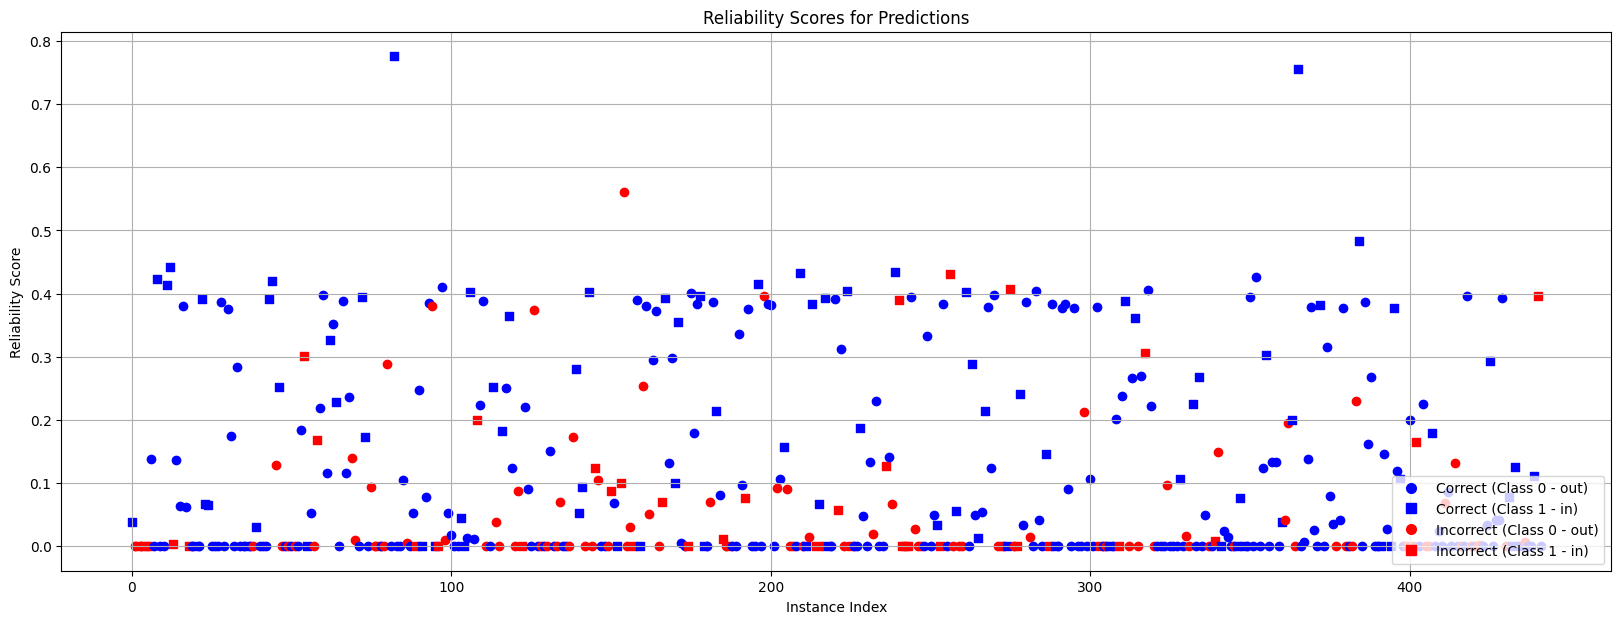

In [5]:
###########################################################
# Results
###########################################################
visualizer = ReliabilityVisualizer(results_df=results_df)

visualizer.plot_reliability_scores((20,7))

In [6]:
reliability_table_df = visualizer.get_reliability_table_5()
print(reliability_table_df)

     Reliability  Correct (0)  Incorrect (0)  Correct (1)  Incorrect (1)
0   [0.00, 0.05]          124             67           27             25
1   ]0.05, 0.10]           15             10            8              5
2   ]0.10, 0.15]           18              5            6              2
3   ]0.15, 0.20]            6              2            5              3
4   ]0.20, 0.25]           10              2            6              0
5   ]0.25, 0.30]            7              2            6              0
6   ]0.30, 0.35]            4              0            2              2
7   ]0.35, 0.40]           33              3           13              2
8   ]0.40, 0.45]            5              0           11              2
9   ]0.45, 0.50]            0              0            1              0
10  ]0.50, 0.55]            0              0            0              0
11  ]0.55, 0.60]            0              1            0              0
12  ]0.60, 0.65]            0              0       

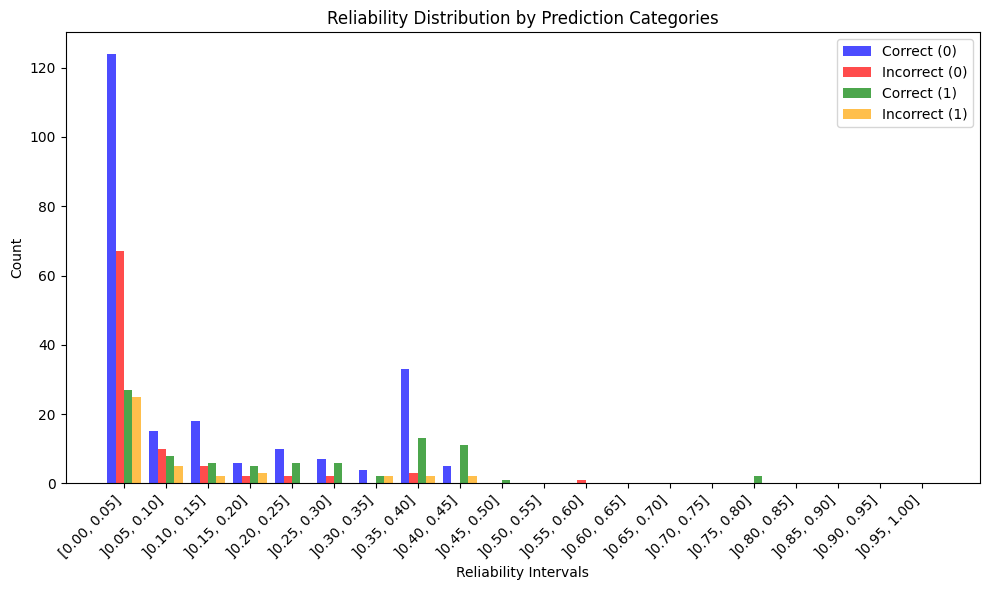

In [7]:
visualizer.plot_table_graph(reliability_table_df)

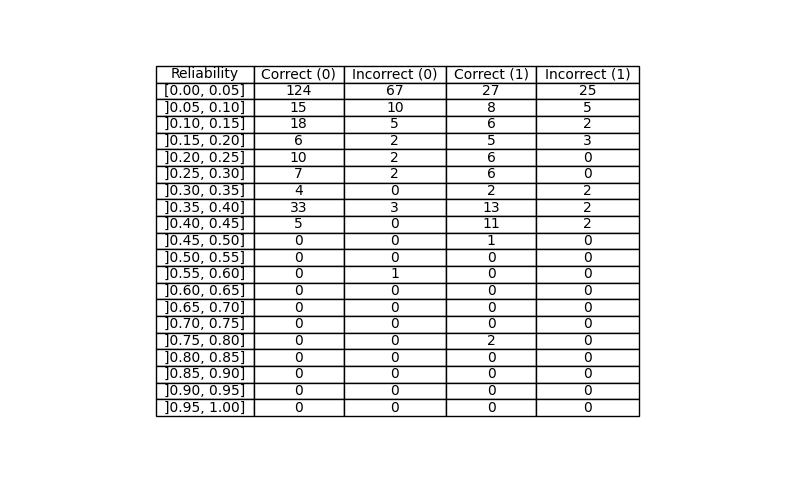

In [8]:
visualizer.plot_table_image(reliability_table_df)

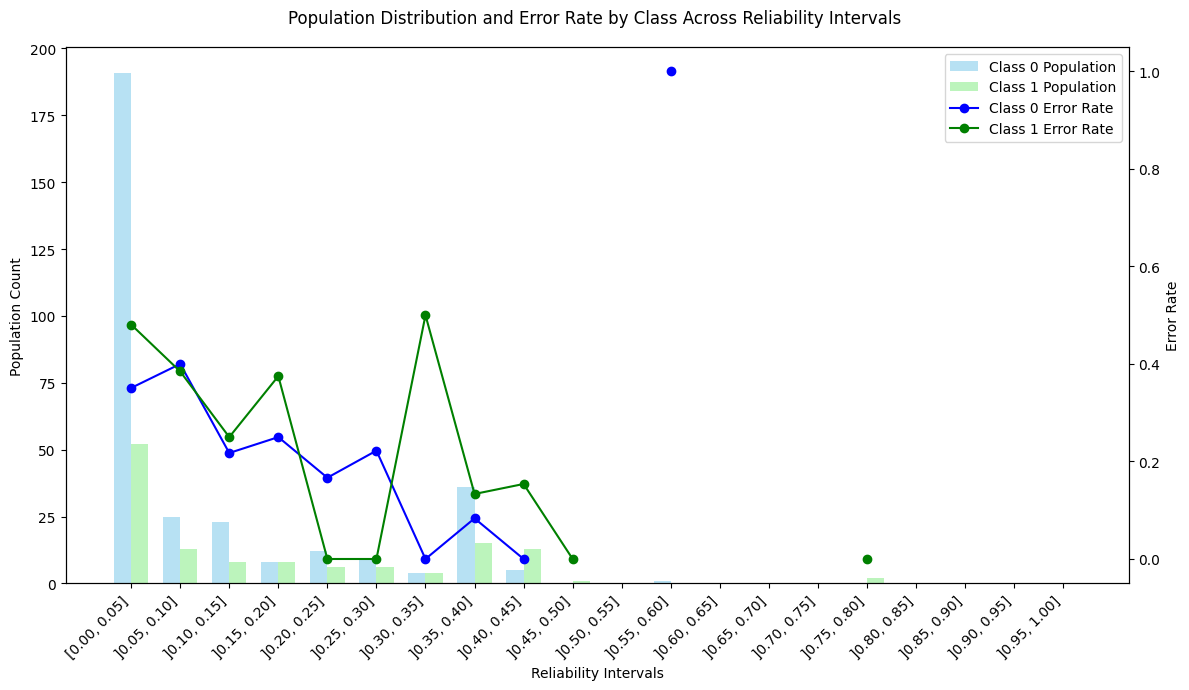

In [9]:
visualizer.plot_population_and_error_rate_by_class(reliability_table_df)

### 10

In [10]:
reliability_table_10_df = visualizer.get_reliability_table_10()
print(reliability_table_10_df)

    Reliability  Correct (0)  Incorrect (0)  Correct (1)  Incorrect (1)
0  [0.00, 0.10]          139             77           35             30
1  ]0.10, 0.20]           24              7           11              5
2  ]0.20, 0.30]           17              4           12              0
3  ]0.30, 0.40]           37              3           15              4
4  ]0.40, 0.50]            5              0           12              2
5  ]0.50, 0.60]            0              1            0              0
6  ]0.60, 0.70]            0              0            0              0
7  ]0.70, 0.80]            0              0            2              0
8  ]0.80, 0.90]            0              0            0              0
9  ]0.90, 1.00]            0              0            0              0


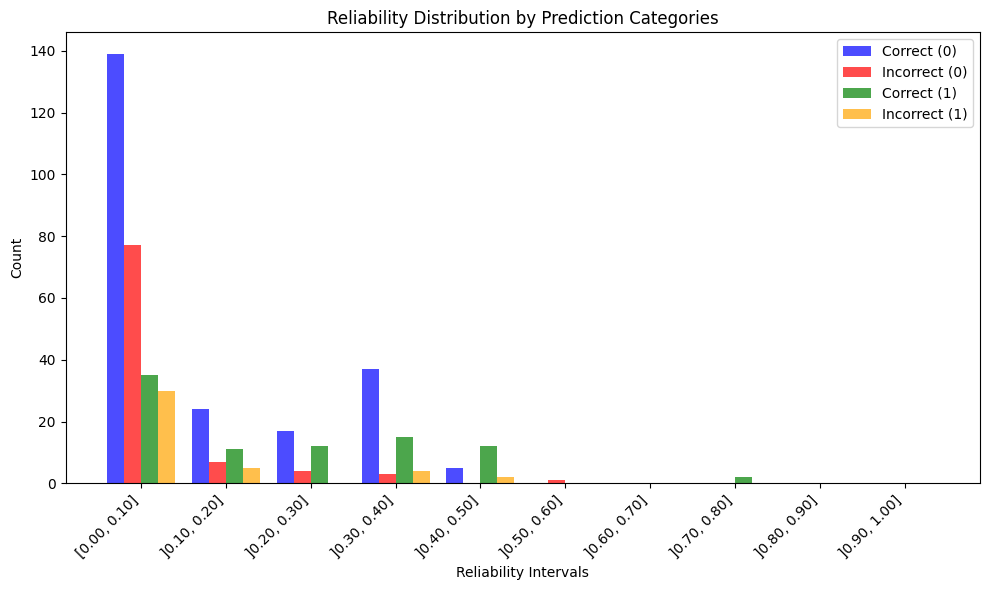

In [11]:
visualizer.plot_table_graph(reliability_table_10_df)

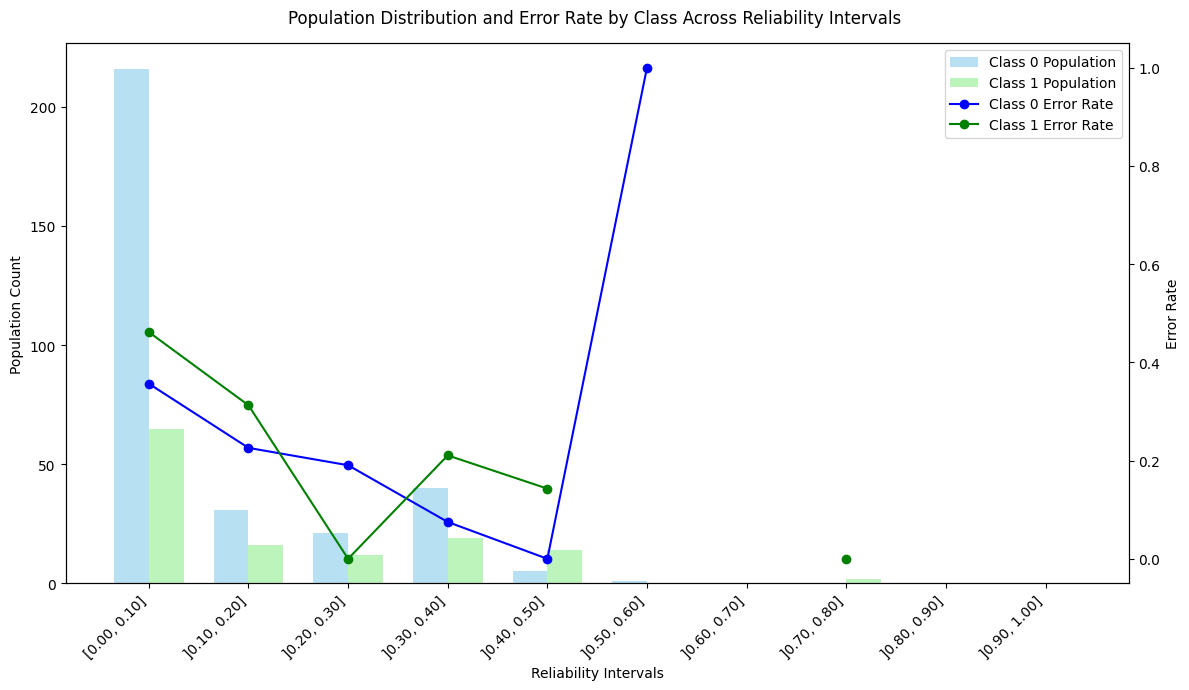

In [12]:
visualizer.plot_population_and_error_rate_by_class(reliability_table_10_df)

Sample reliability interval assignment:
   reliability_score reliability_interval
0           0.038287        (-0.001, 0.1]
1           0.000000        (-0.001, 0.1]
2           0.000000        (-0.001, 0.1]
3           0.000000        (-0.001, 0.1]
4           0.000000        (-0.001, 0.1]
5           0.000000        (-0.001, 0.1]
6           0.138089           (0.1, 0.2]
7           0.000000        (-0.001, 0.1]
8           0.422845           (0.4, 0.5]
9           0.000000        (-0.001, 0.1]


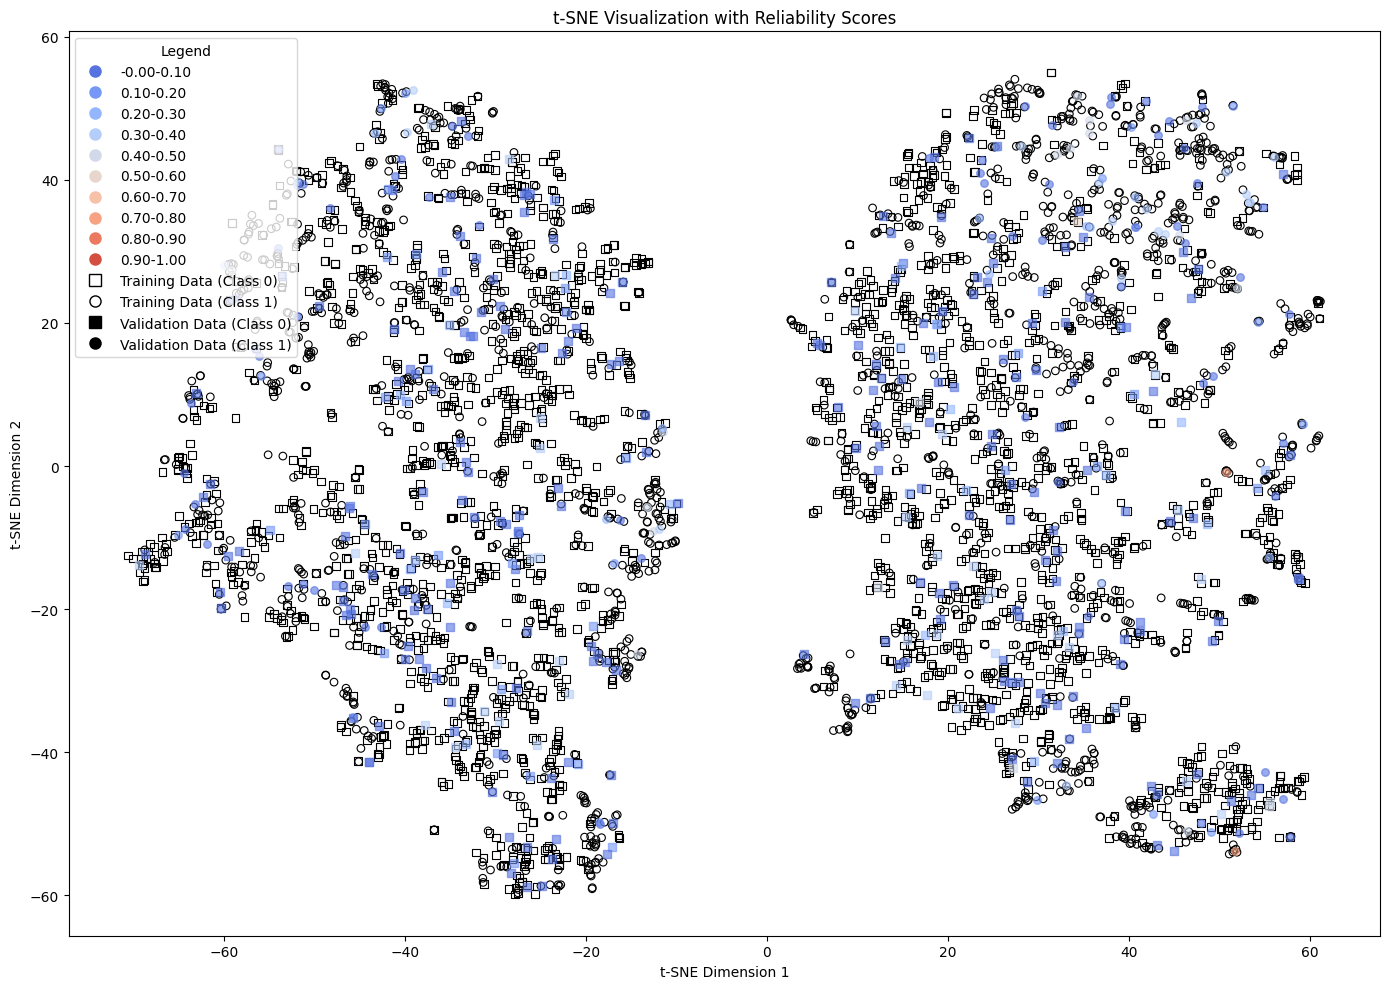

In [13]:
visualizer.plot_tsne_with_reliability(
    X_train_preprocessed, validation_data, y_train, pipeline
)